<a href="https://colab.research.google.com/github/annguyenhuynh/Anhuynh/blob/main/Comprehensive_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Linear Regression

In [ ]:
companies = pd.read_csv('/content/drive/MyDrive/1000_Companies.csv')
companies.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [ ]:
companies.describe()

R&D Spend  Administration  Marketing Spend         Profit
count    1000.000000     1000.000000      1000.000000    1000.000000
mean    81668.927200   122963.897612    226205.058419  119546.164656
std     46537.567891    12613.927535     91578.393542   42888.633848
min         0.000000    51283.140000         0.000000   14681.400000
25%     43084.500000   116640.684850    150969.584600   85943.198543
50%     79936.000000   122421.612150    224517.887350  117641.466300
75%    124565.500000   129139.118000    308189.808525  155577.107425
max    165349.200000   321652.140000    471784.100000  476485.430000

In [ ]:
companies.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

array([[<Axes: title={'center': 'R&D Spend'}>],
       [<Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'Marketing Spend'}>],
       [<Axes: title={'center': 'Profit'}>],
       [<Axes: >]], dtype=object)

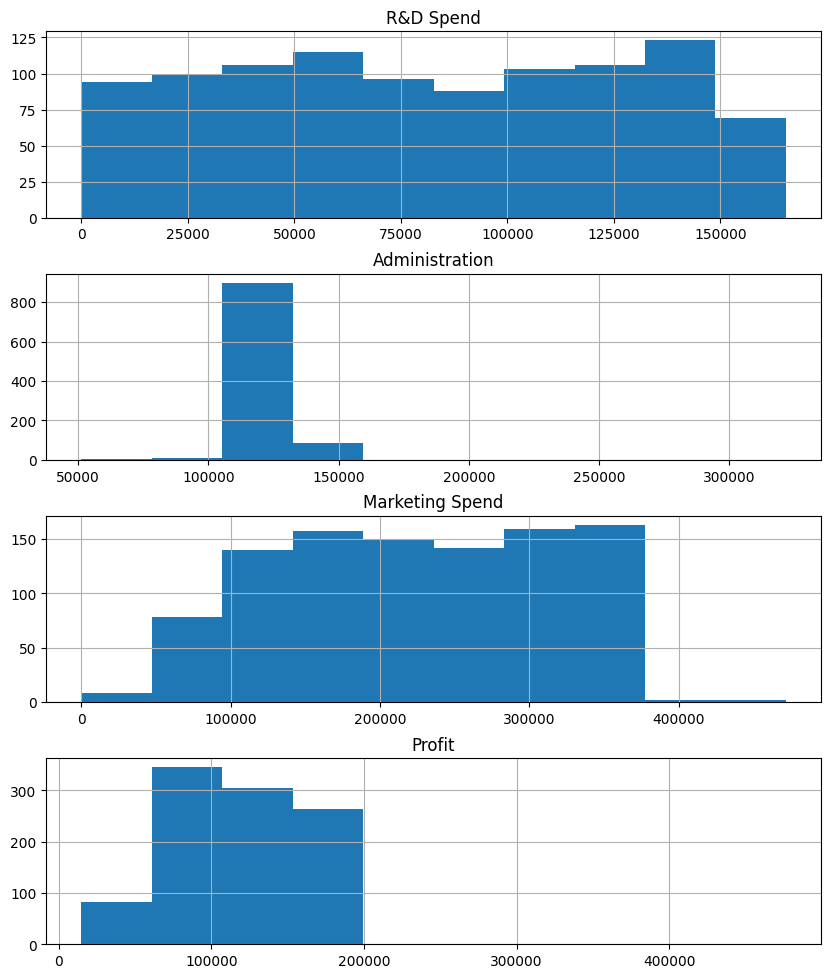

In [ ]:
#Plot data distribution
companies.hist(layout=(5,1),figsize=(10,15))

In [ ]:
# Define dependent and indenpent varialbes
X=companies.iloc[:,:-1].values
y=companies.iloc[:,4].values
companies.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

<Axes: >

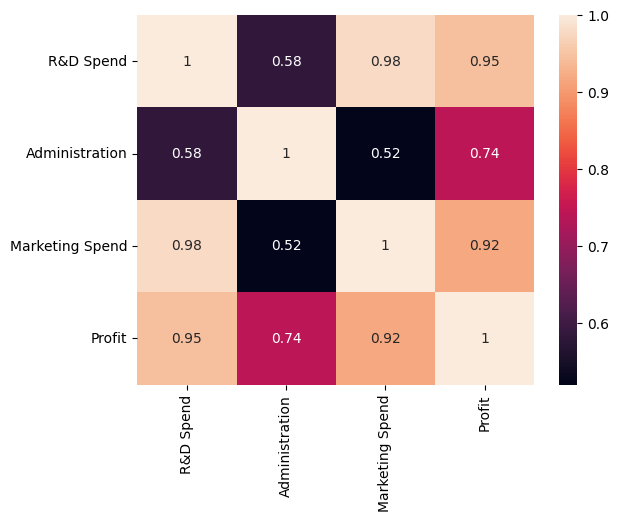

In [ ]:
# Plot the correlation between variables
numeric_companies = companies.select_dtypes(include=['number'])
sns.heatmap(numeric_companies.corr(),annot=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder=LabelEncoder()
categorical_features = labelencoder.fit_transform(X[:,3])

ct = ColumnTransformer([("State",OneHotEncoder(), [3])],remainder="passthrough")
X = ct.fit_transform(X)

**Categorical Transformation explain**

*   LabelEncoder: LabelEncoder is a tool from the sklearn.preprocessing module used to convert categorical text data into numerical labels. For instance, if you have a feature column with the values ['cat', 'dog', 'fish'], the LabelEncoder would convert these into [0, 1, 2].

*   ColumnTransformer: The ColumnTransformer is another tool from the sklearn.compose module that applies different transformations to different columns of the data.

*   OneHotEncoder converts categorical integer data into one-hot encoded vectors. For example, if you have 3 categories labeled [0, 1, 2], one-hot encoding will convert these into [[1, 0, 0], [0, 1, 0], [0, 0, 1]]

*   remainder="passthrough": This means that all columns that are not explicitly transformed (i.e., columns other than column 3) should be left as they are ("passed through") in the output.



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)


[ 5.26235224e+02 -3.54301375e+02 -1.71933849e+02  5.25845857e-01
  8.44390881e-01  1.07574255e-01]


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9112695892268727

**Regularization Models**

*   In Linear Regression model, we may have the problems of overfitting the data where the training accuracy is high but the testing accuracy is low. To prevent this, we add *regularization term* to the cost function of the model.

*   The 2 common algorithms are Ridge and Lasso

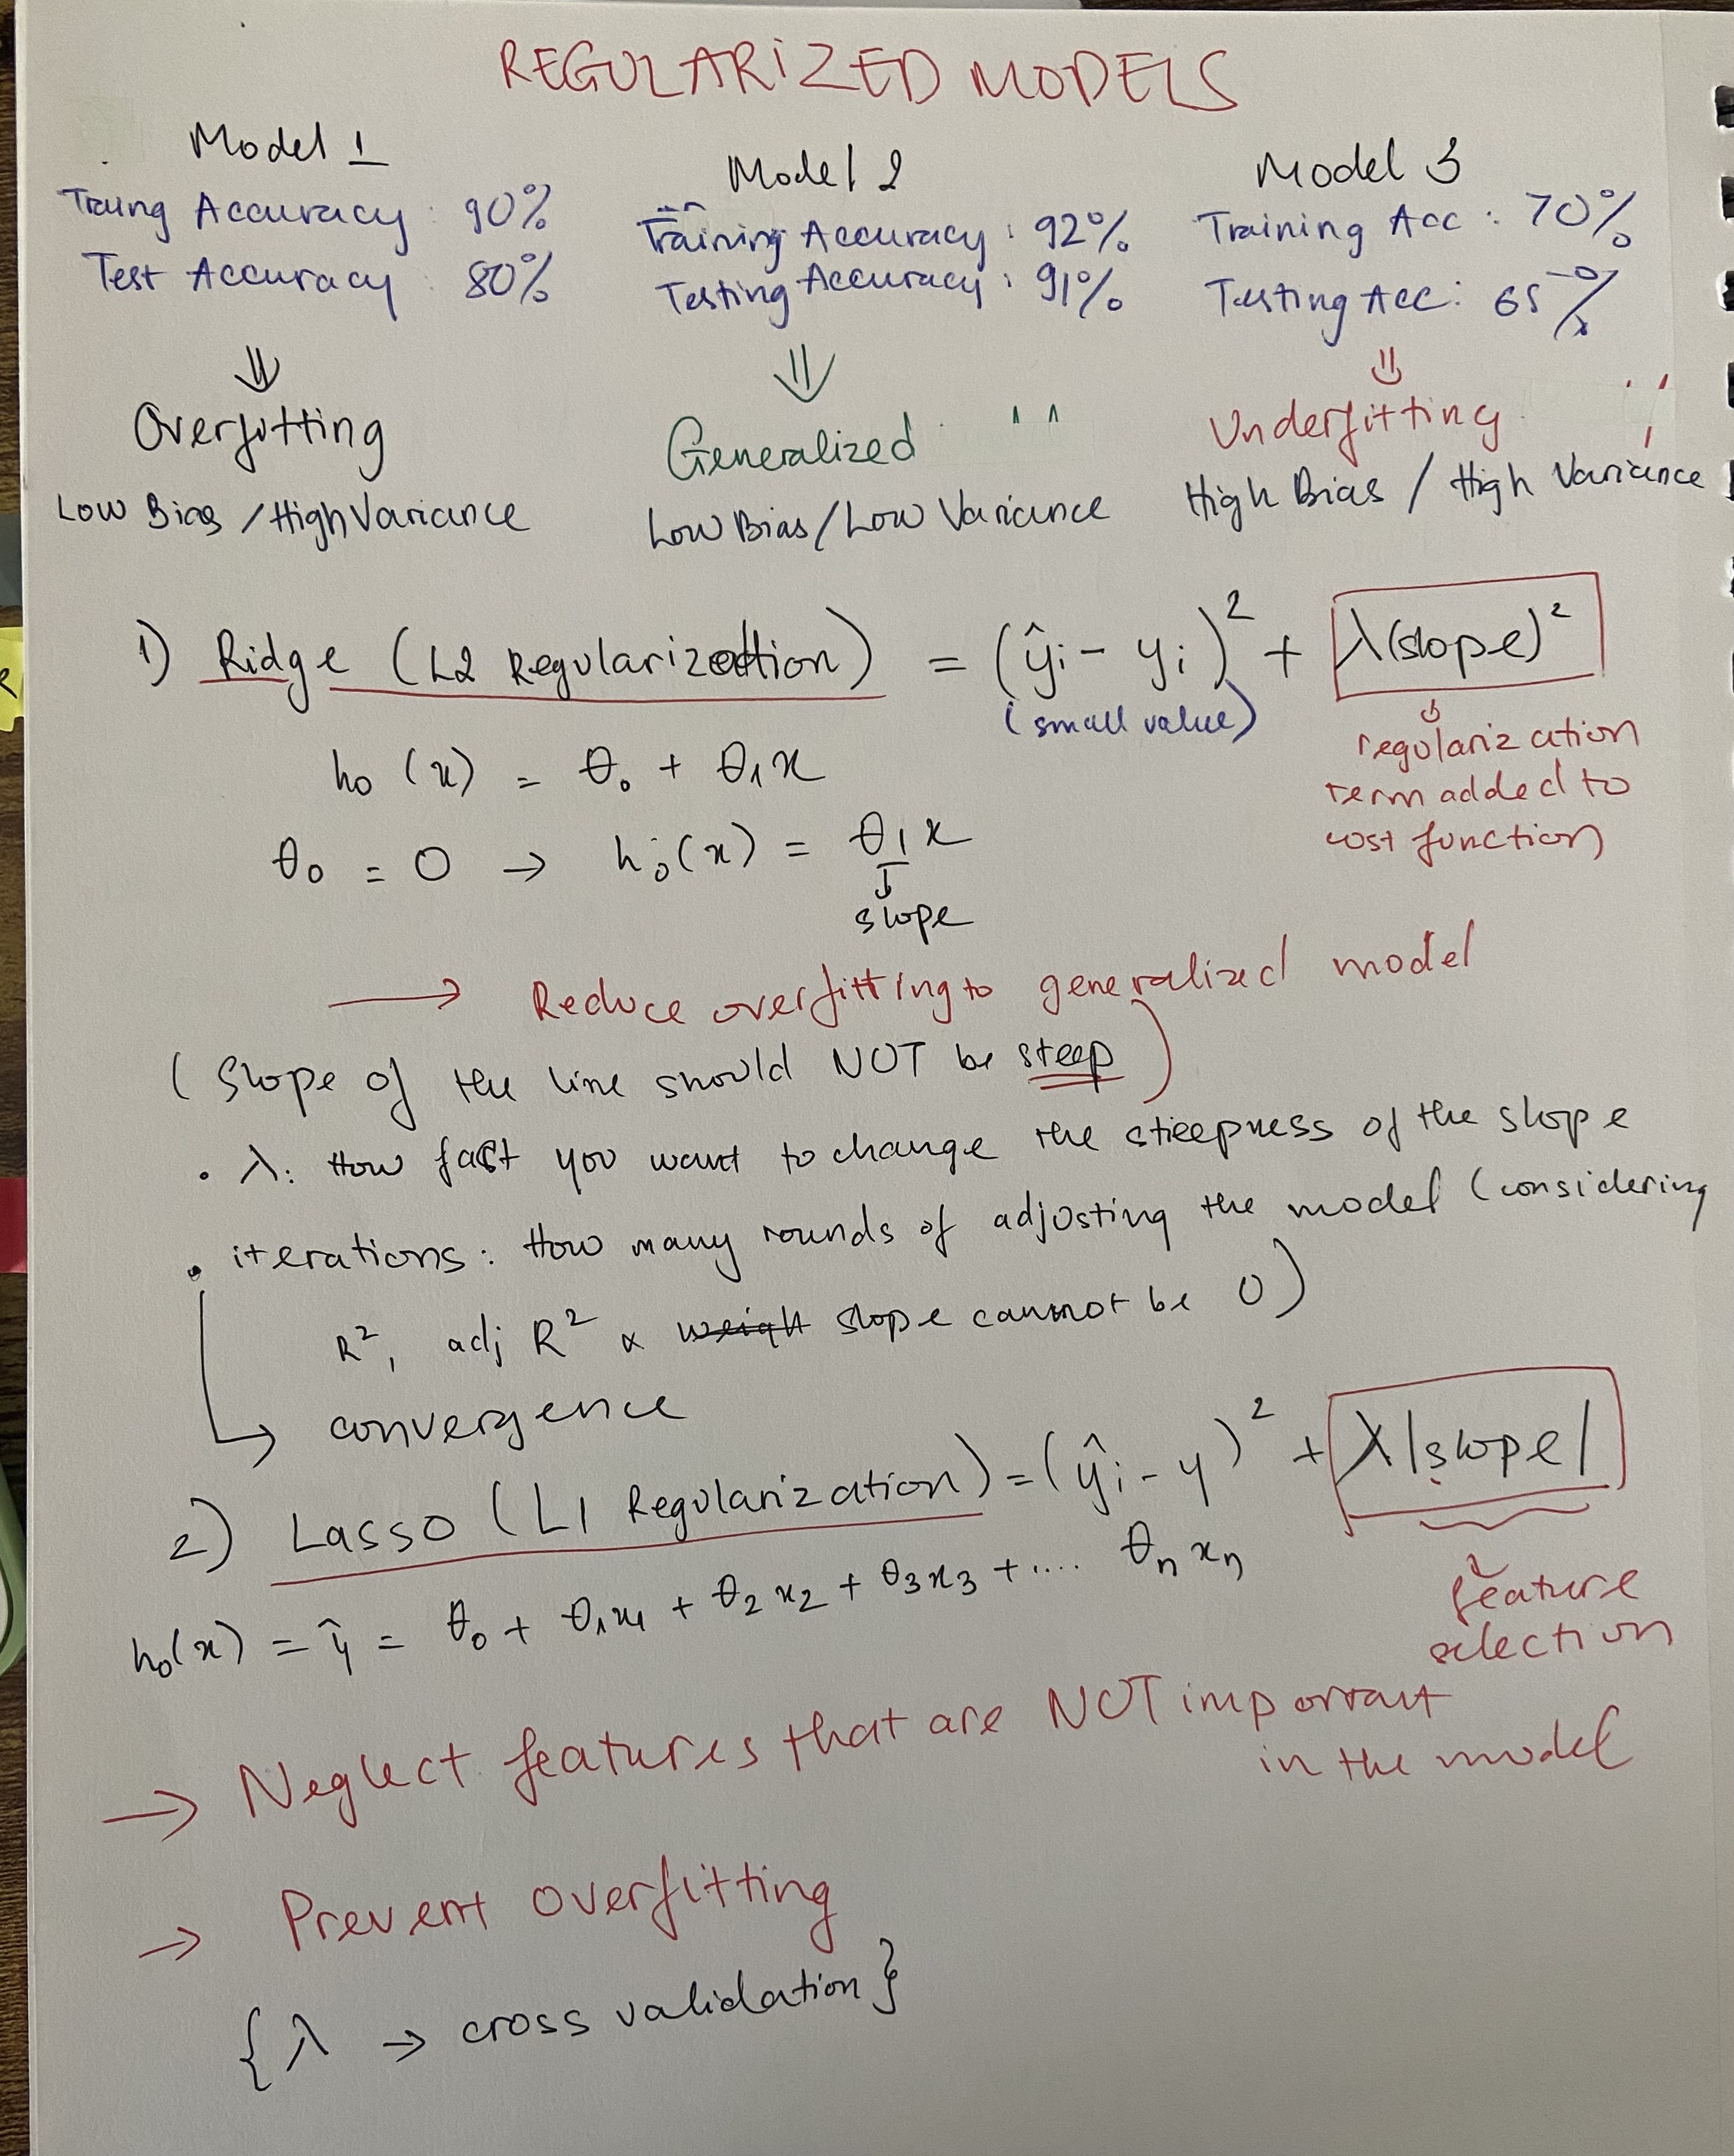










In [ ]:
X = 2 * np.random.rand(100,1)
y = 4+3*X + np.random.randn(100,1)

# y = 4+3xi + Gaussian noise

X_b = np.c_[np.ones((100,1)),X] # add x0=1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [ ]:
theta_best

# We expect to se theta0 = 4 and theta-i=3 instead of 3.9 and 3.0

array([[3.94993499],
       [2.99542492]])

In [ ]:
# Now we can make prediction using theta-hat
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_pred = X_new_b.dot(theta_best)
y_pred

array([[3.94993499],
       [9.94078484]])

(0.0, 2.0, 0.0, 15.0)

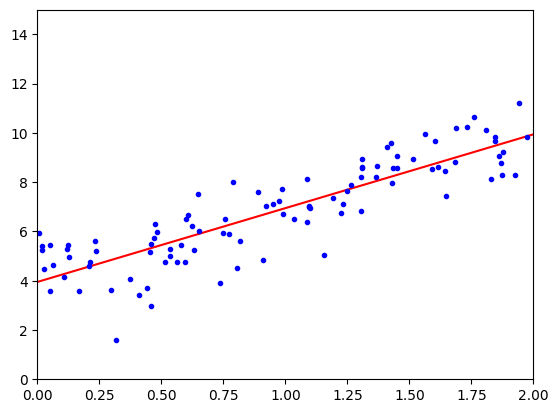

In [ ]:
plt.plot(X_new,y_pred,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.94993499]), array([[2.99542492]]))

In [ ]:
lin_reg.predict(X_new)

array([[3.94993499],
       [9.94078484]])

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict(X_new)

array([[4.03201253],
       [9.85173476]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict(X_new)

array([ 3.64426652, 10.16315191])

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict(X_new)

array([4.23200187, 9.63475622])

In [ ]:
# Elastic Net is the middle ground between Ridge and Lasso
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict(X_new)

array([4.44119636, 9.40779055])

# Logistic Regression

**Math behind Logistic Regression**
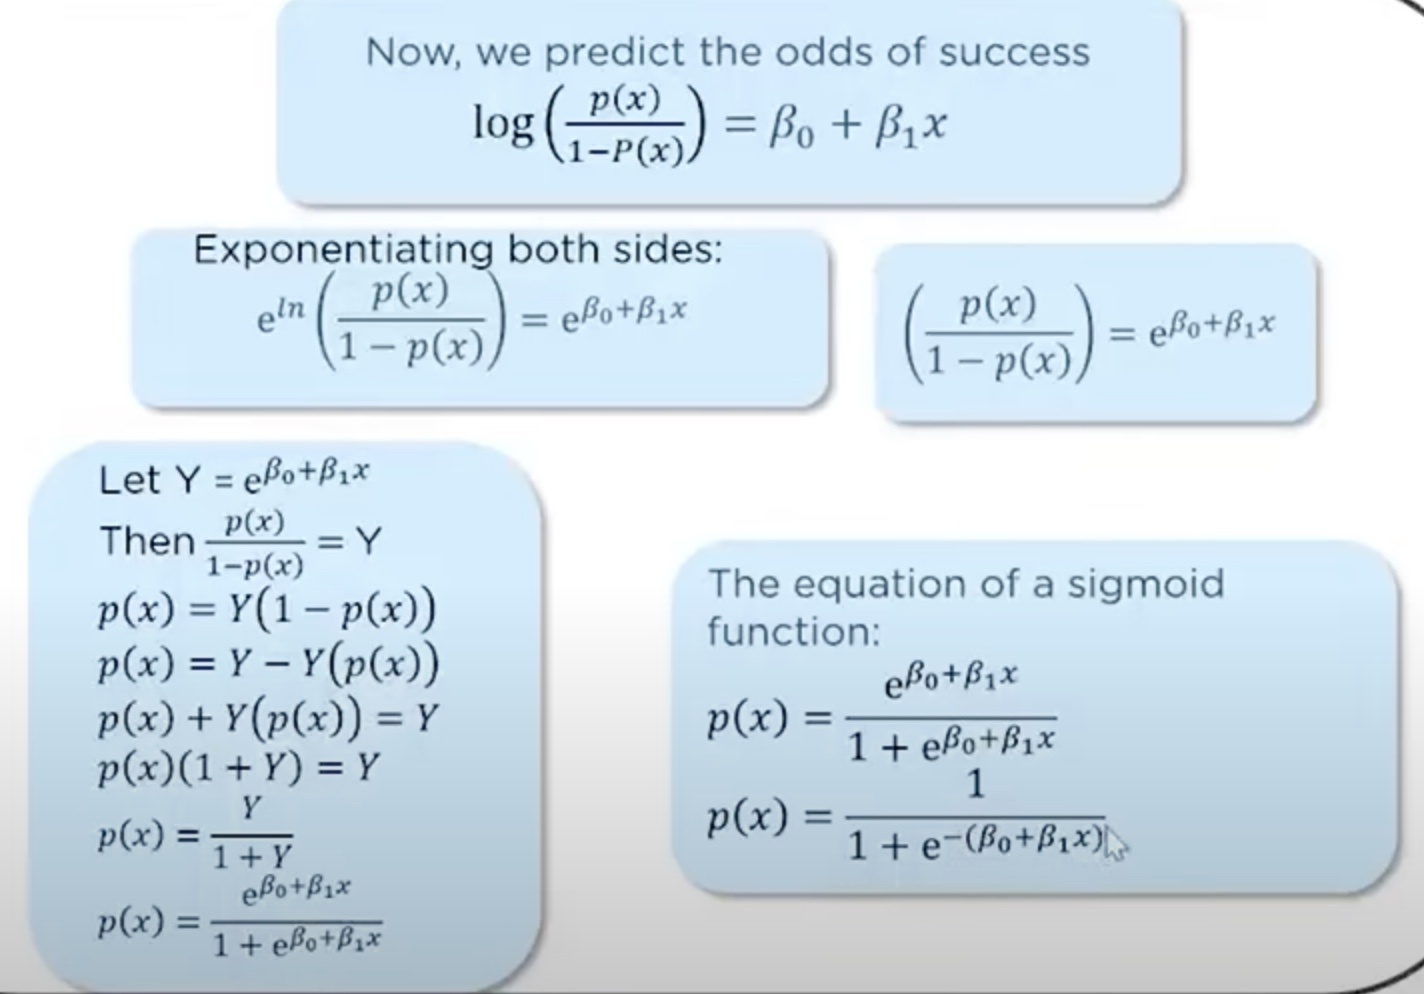

In [ ]:
from sklearn.datasets import load_digits
digits=load_digits()

In [ ]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


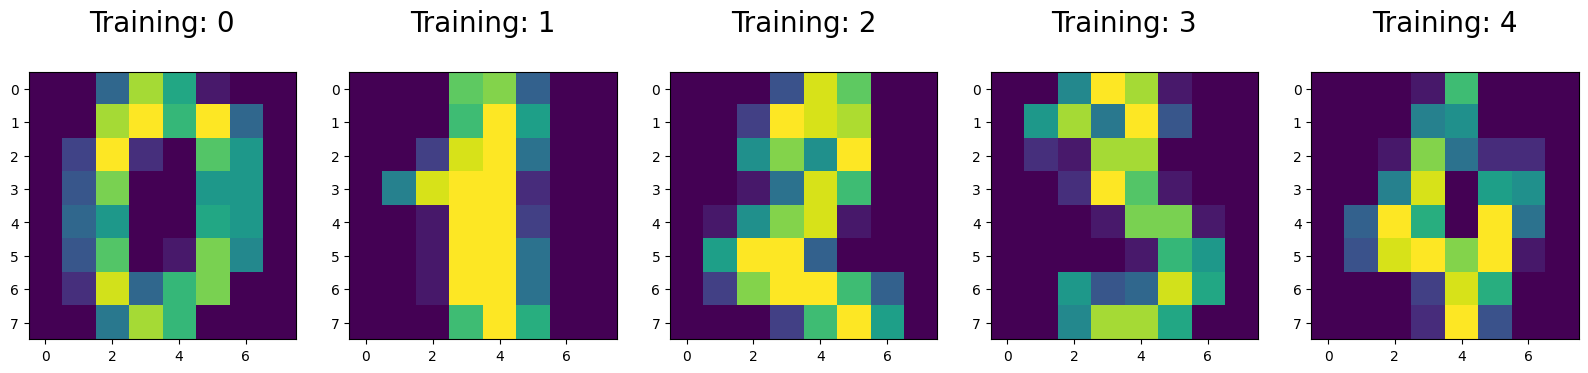

In [ ]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(image, (8,8)))
  plt.title('Training: %i\n' % label, fontsize=20)

In [ ]:
# Breakdown of the code
"""
enumerate(zip(digits.data[0:5], digits.target[0:5])):
digits.data[0:5] selects the first five images.
digits.target[0:5] selects the first five corresponding labels.
zip pairs each image with its corresponding label.
enumerate adds an index to each (image, label) pair, which is used for positioning the plots.
"""

'\nenumerate(zip(digits.data[0:5], digits.target[0:5])):\ndigits.data[0:5] selects the first five images.\ndigits.target[0:5] selects the first five corresponding labels.\nzip pairs each image with its corresponding label.\nenumerate adds an index to each (image, label) pair, which is used for positioning the plots.\n'

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(digits.data, digits.target,test_size=0.23,random_state=2)

In [ ]:
print(X_train.shape)

(1383, 64)


In [ ]:
print(y_train.shape)

(1383,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(log_reg.predict(X_test[0].reshape(1,-1)))

[4]


In [ ]:
score = log_reg.score(X_test, y_test)
print(score)

0.9516908212560387


In [ ]:
# Confution matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,(log_reg.predict(X_test)))

In [ ]:
predictions = log_reg.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score: 0.9516908212560387')

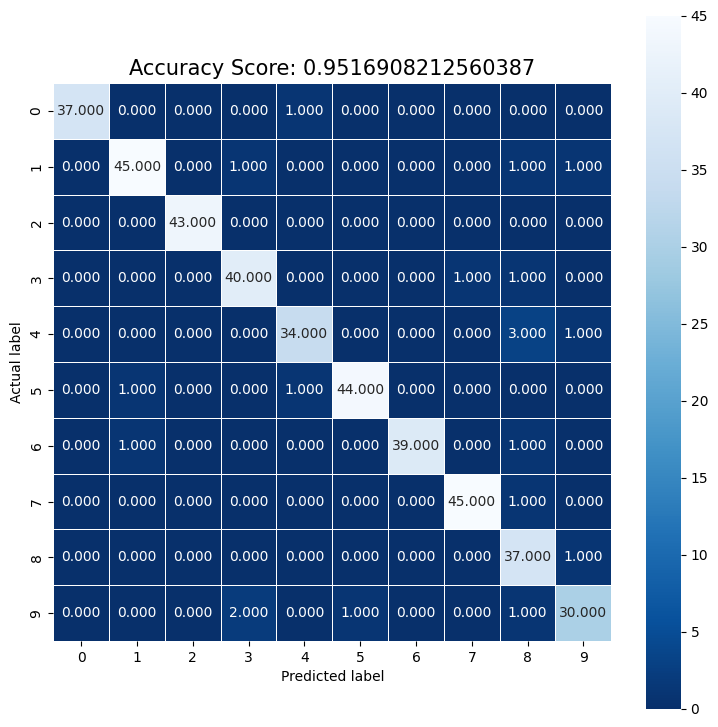

In [ ]:
# Representing confusion matrix in a heatmap
index = 0
miclassificationIndex = []
for predict, actual in zip(predictions,y_test):
  if predict==actual:
    miclassificationIndex.append(index)
  index +=1

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f",linewidth=0.5,square=True,cmap='Blues_r');
plt.ylabel("Actual label");
plt.xlabel("Predicted label");
all_sample_title='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)



*  Figure explain: Take 34 on the diagonal line. 34 means that 34 images out of 38 images selected have been predicted correctly, 3 are predicted as 8 and 1 is predicted as 9




# Ensemble Learning



**Voting Classifier**

*   Suppose you have trained a few classifiers, each one achieving about 80% accuracy. You may have a Logistic Regression classifier, a SVM classifier, a Random Forest classifier, a KNN classifier, and perhaps a few more

*   A simple way to create an even better classifier is to aggregate the predictions of each classifier and predicts the class that gets the most votes. This majority-vote classifier is called a hard-voting classifier.

*   Ensemble methods work best when the predictors are as independent from one another as possible.



In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X=iris["data"]
y=iris["target"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [ ]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('lr',log_clf),('rf',rnd_clf),('svm',svm_clf)],voting="hard")
voting_clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svm', SVC())])

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 1.0
RandomForestClassifier 1.0
SVC 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2)

In [ ]:
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

# Bagging and Pasting

*   To get a diverse set of classifiers, train the predictors on different subsets of training sets.

*   When sampling is performed **with** replacement, this method is called *bagging* (short for *bootsrap aggregating*)

*   When sampling is performed **without** replacement,it is called *pasting*

*   Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all the predictors. The aggregation function is typically of the *statistical mode* (i.e., the most frequent prediction for classification, or the average for regression)

*   Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance. Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original dataset.







In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,
    max_samples=100,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

*   Boostraping introduces a bit more diversity in the subsets that each predictor is trained on, so bagging ends up with sligtly higher bias than pasting, but the extra diversity also means that the predictors end up being less correlated, so the ensemble variance is reduced.

*   By default, a BaggingClassifier samples m training instances with replacement (bootstrap=True), which means that some instances maybe sampled several times while other instances are not sampled at all. This means that only 63% of the training instances are sampled on average for each predictor, the remaining 37% of the training instances that are not sampled are called **out-of-bag(oob)** instances


*   You can set **oob_score=True** when creating a BaggingClassifier to request an automatic oob evaluation after training.







In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,
    max_samples=100,bootstrap=True,n_jobs=-1,oob_score=True)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_pred,y_test))

1.0


# Decision Tree - Important terms

*   Entropy: the measure of randomness or unpredictability in the dataset

*   Information gain: It is the measure of decrease in entropy after the dataset is split

*   Leaf node: the subsets

*   Decision node: Decision node has 2 or more branches (they have to make a choice to which subset they will go down to)

*   Root node: the top most decision node (the orginial dataset)

*   We want to split the original data where we has the highest **information gain**.





# Bagging (Bootstrap Aggregation): Random Forests

*   The collection of decision trees

*   RandomForest works pretty good with missing data

*   Make predictions based on the 'majority vote' from the decision trees

*   Random Forests models DONT need Scaling

*   Random Forests models are not affected by outliers








In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [ ]:
# Adding a new column for the species name
df['species'] = pd.Categorical.from_codes(iris.target,iris.target_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [ ]:
len(df.index)

150

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [ ]:
#Creating Test and Train Data
df['is_train'] = np.random.uniform(0,1,len(df)) <= 0.75

# This generates an array of random numbers (floats) between 0 and 1.
# The length of this array is equal to the number of rows in df.
# If a number is less than or equal to 0.75, the condition is True; otherwise, it's False.

df.head()


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  is_train  
0  setosa      True  
1  setosa      True  
2  setosa      True  
3  setosa      True  
4  setosa      True

In [ ]:
train,test = df[df['is_train']==True], df[df['is_train']==False]
print("Number of observations in the training set:", len(train))
print("Number of observations in the testing set:", len(test))

Number of observations in the training set: 120
Number of observations in the testing set: 30


In [ ]:
# Create a list of features column's names
features = df.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
# Converting each species name into digits
y = pd.factorize(train['species'])[0]
y

#pd.factorize() function in pandas is used to encode categorical variables into numerical labels. It converts a categorical (or non-numeric) variable into a numerical representation

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
rnd_clf = RandomForestClassifier(n_jobs=2,random_state=42)
# n_jobs controls the number of CPU cores used to run the training and prediction processes in parallel.
rnd_clf.fit(train[features],y)

RandomForestClassifier(n_jobs=2, random_state=42)

In [ ]:
rnd_clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# View the predicted probabilities of the first 10 observations
rnd_clf.predict_proba(test[features])[10:20]

array([[0.  , 0.98, 0.02],
       [0.  , 0.79, 0.21],
       [0.  , 0.97, 0.03],
       [0.  , 1.  , 0.  ],
       [0.  , 0.02, 0.98],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.02, 0.98]])

In [ ]:
preds = iris.target_names[rnd_clf.predict(test[features])]
preds[10:20]

array(['versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Creating a confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

#crosstab takes 2 sets of data and return a chart

Predicted Species  setosa  versicolor  virginica
Actual Species                                  
setosa                 10           0          0
versicolor              0           8          1
virginica               0           0         11

In [ ]:
preds = iris.target_names[rnd_clf.predict([[5.0,3.6,1.4,2.0],])]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(preds)

['setosa']


# Boosting

*   Combine several weak learners into a strong learner. The idea is to train the model sequentially, each trying to correct its predecessor. The 2 most popular boosting algorithm are **AdaBoost** and **Gradient Boosting**

*   **AdaBoost**

    *   One way for new predictor to corrects its predecessor is to pay a bit more attention to the training instances that the predecessors underfitted

    *   For e.g., when training an AdaBoost classifier, the algorithm first train a base classier(Decision Tree) and uses it to make the predictions on the training set.The algorithm then increases the relative weight of missclassified training instances. Then, it trains the 2nd classifier using the updated weights, and again make predictions on the training set, update
    the instance weights, and so on.

    *   Metrics calculated in AdabBoost: Total Errors and Performance of Stumps (Decison tree with depth=1)
      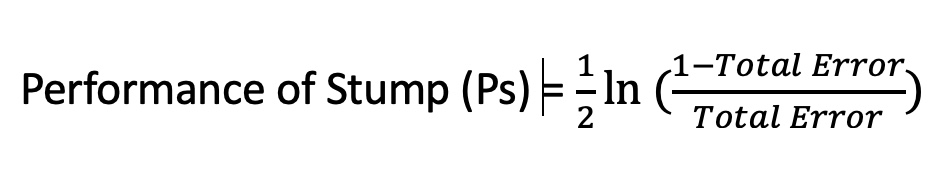

    *   Weights update

  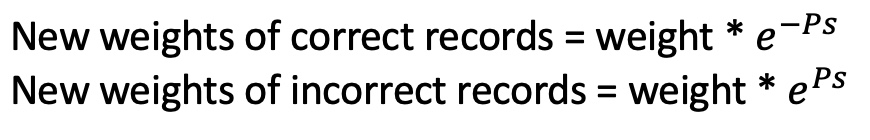





In [ ]:
data = iris
X=data.data
y=data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm = "SAMME.R", learning_rate=0.5)

ada_clf.fit(X_train,y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

**Gradient Boosting**

*   Like AdaBoost, GD Boosting works by sequentially adding predictors to an ensemble, each one correct its predecessor

*   Unlike AdaBoost, this method tries to fit the new predictor to the **residual errors** made by the previous predictor



In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf1 = DecisionTreeClassifier(max_depth=2)
tree_clf1.fit(X,y)

y2 = y - tree_clf.predict(X)
tree_clf2 = DecisionTreeClassifier(max_depth=2)
tree_clf2.fit(X,y2)

y3 = y2 - tree_clf2.predict(X)
tree_clf3 = DecisionTreeClassifier(max_depth=2)
tree_clf3.fit(X,y3)


DecisionTreeClassifier(max_depth=2)

In [ ]:
y_pred = sum(tree.predict(X_test) for tree in (tree_clf1, tree_clf2, tree_clf3))

In [ ]:
 # A simpler way to perform the above step is usign GradientBoostingRegressor
 from sklearn.ensemble import GradientBoostingClassifier

 gbrt = GradientBoostingClassifier(max_depth=2,n_estimators=3,learning_rate=1.0)
 gbrt.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=3)

# KNN Algorithm

*   It classifies a data point based on how its neighbors are classified

*   KNN Algorithm is based on **feature similarity**: Choosing the right value of *k* is a process called **parameter tuning**, and it's important for better accuracy

*   To choose a value of k
    *   Sqrt(n), where n is the total number of data points
    *   *Odd* value of K is selected to avoid confusion between 2 classes of data





In [ ]:
diabetes = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# Values from column Glucose to column BMI cannot contain 0 because it will affect the outcome
# We will replace 0 with the mean values of respective columns

zeros_not_accepted = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in zeros_not_accepted:
  diabetes[column] = diabetes[column].replace(0,np.NaN)
  mean = int(diabetes[column].mean(skipna=True))
  diabetes[column].replace(np.NaN,mean, inplace=True)

In [ ]:
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    155.0  33.6   
1            1     85.0           66.0           29.0    155.0  26.6   
2            8    183.0           64.0           29.0    155.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
X = diabetes.iloc[:,0:8]
y = diabetes.iloc[:,8]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import math
math.sqrt(len(y_test))
# This will be used to determine the number of K
# Since 12 is a even number, we will choose k(n_neighbors) as 11

12.409673645990857

In [ ]:
# Define the model: Init K-NN
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
y_pred = knn_classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[80 19]
 [20 35]]


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_pred,y_test))

0.6422018348623852


In [ ]:
print(accuracy_score(y_pred,y_test))

0.7467532467532467


# Support Vector Machine

*   We create a hyperplane that splits the data. The best hyperplane is defined when the distance between the points(support vectors) and the hyperplane is the furthest.

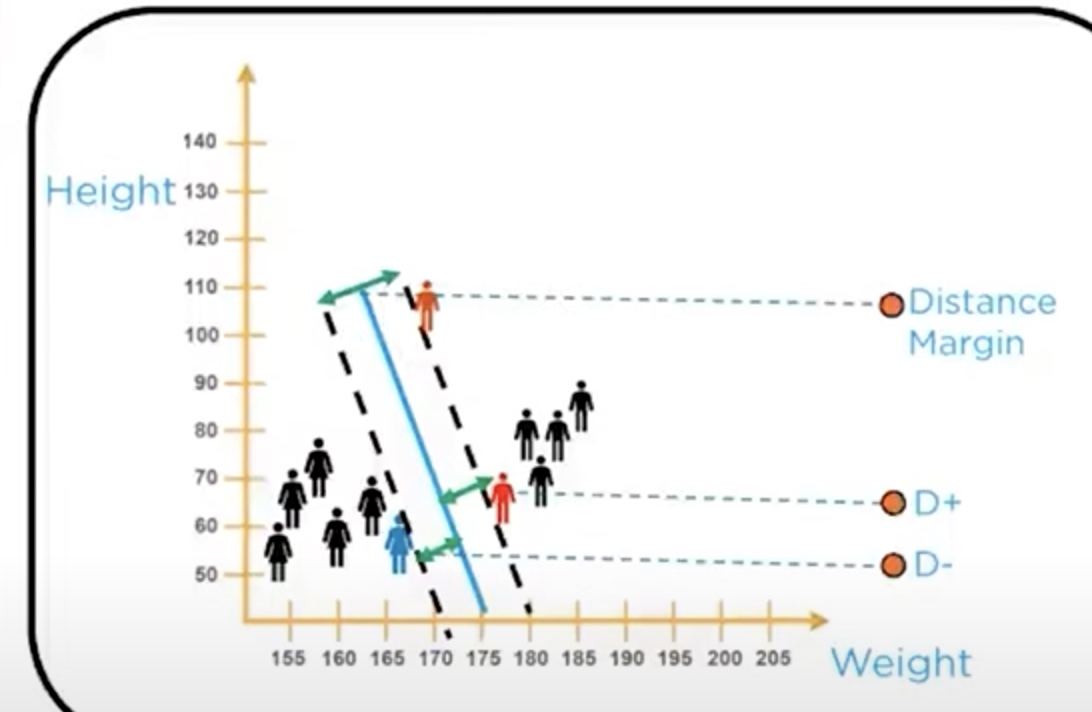


*   D+ is the shortest distance to the positive point --> man

*   D- is the shortest distance to the negative point --> woman

*   The sum of D+ or D- is called **distance margin**

*  From the distance margin, we get the optimal hyperplane







**Advantages of SVM**

*   High dimensional input space - the curse of dimensionality

*   Sparse document vector - tokenization in NLP

*   Regularization parameter - avoid bias and overfitting problems



In [ ]:
from sklearn import svm
from sklearn.datasets import make_blobs

#make_blobs: Generate isotropic Gaussian blobs for clustering.

In [ ]:
X,y = make_blobs(n_samples=40, centers=2, random_state=20)

In [ ]:
y.shape

(40,)

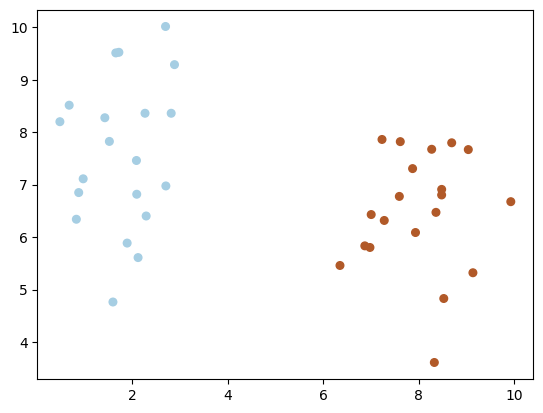

In [ ]:
# Firt the model, don't regularize for illustration purpose
svm_clf = svm.SVC(kernel='linear',C=1000)
svm_clf.fit(X,y)

plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap = plt.cm.Paired)



**Code exaplained**

*   **kernel='linear'**: This specifies that the SVM should use a linear kernel. A kernel is a function that transforms the data into a higher-dimensional space to make it easier to separate using a hyperplane. In this case, the linear kernel means that the decision boundary will be a straight line (or hyperplane in higher dimensions).

*   **C=1000**: The C parameter is a regularization parameter that controls the trade-off between achieving a low error on the training data and minimizing the complexity of the decision boundary. A large value of C (like 1000) tries to classify all training examples correctly by giving more importance to minimizing classification errors.


*   X[:, 0] and X[:, 1]: These extract the first and second feature (or column) of the dataset X, representing the x and y coordinates for plotting.

*   c=y: This sets the color of each point in the scatter plot according to its label y. Different classes will have different colors.

*   s=30: This specifies the size of the scatter points (30 units in this case)

*   cmap=plt.cm.Paired: This sets the colormap for the scatter plot. plt.cm.Paired is a predefined colormap that assigns different colors to different classes.






In [ ]:
new_data = [[3,4],[5,6]]
print(svm_clf.predict(new_data))

[0 1]


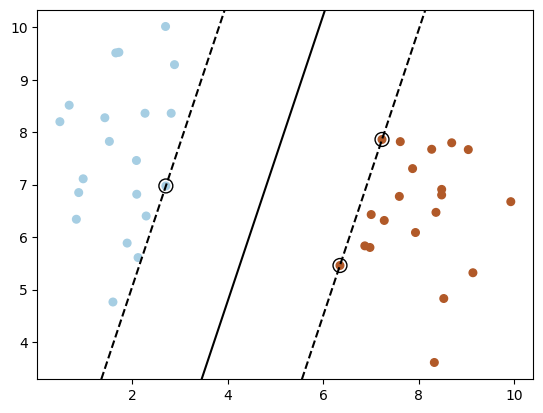

In [ ]:
svm_clf = svm.SVC(kernel='linear',C=1000)
svm_clf.fit(X,y)

plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap = plt.cm.Paired)

# Plot the decision function
ax = plt.gca()
 #Get Current Axes (the one built using plt. scatterplot)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

ax.scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k') #highlight the support vectors




**How the plot is created?**

*   **xx = np.linspace(xlim[0], xlim[1], 30)** and **yy = np.linspace(ylim[0], ylim[1], 30)**
    *   np.linspace(start, stop, num) generates num evenly spaced points between start and stop. Here, xx is a grid of 30 points between the minimum and maximum values of the x-axis, and yy is a grid of 30 points between the minimum and maximum values of the y-axis.

*   **np.meshgrid** creates a grid of coordinates from the vectors xx and yy. This function returns coordinate matrices from coordinate vectors, useful for evaluating functions over a 2D grid.

    *   **XX** and **YY** are 2D arrays where each row represents the x and y coordinates of points in the grid.

*   **xy = np.vstack([XX.ravel(), YY.ravel()]).T**

    *  **XX.ravel() and **YY.ravel()** flatten the 2D arrays into 1D arrays (i.e., they convert the grid of coordinates into a list of points).

    *   **np.vstack([XX.ravel(), YY.ravel()])** stacks the flattened arrays vertically, creating a 2D array where each row represents a coordinate pair (x, y).


*  **.T** transposes the array so that each row corresponds to a single point (i.e., converting it from shape (2, n) to shape (n, 2)).

*   **Z = svm_clf.decision_function(xy).reshape(XX.shape)**

    *   **svm_clf.decision_function(xy)** calculates the decision function for each point in xy. The decision function tells you how far a point is from the decision boundary. A positive value indicates one class, while a negative value indicates the other.

    *   **.reshape(XX.shape)** reshapes the decision function output back into a grid that matches the shape of XX and YY.

*   **ax.contour(XX, YY, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')**: This line draws contour lines for the decision boundary and margins:

    *   Z = 0: The decision boundary (solid line).

    *   Z = ±1: The margins (dashed lines).









# Nonlinear SVM Classification

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

In [ ]:
X, y = make_moons(n_samples=100,noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(C=10, loss="hinge"))
])

In [ ]:
polynomial_svm_clf.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm', LinearSVC(C=10, loss='hinge'))])

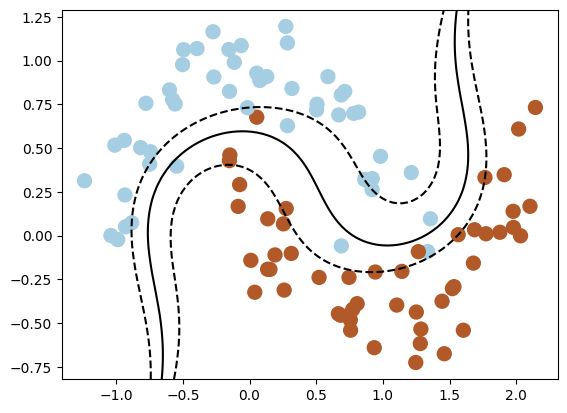

In [ ]:
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.Paired)

# Get the current axes
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Transform the grid points (apply polynomial features and scaling)
Z = polynomial_svm_clf.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and margins
ax.contour(XX, YY, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')



In [ ]:
# Polynomial kernel

# The kernel make it possible to get the same result as if you have added may polynomial features

from sklearn.svm import SVC


In [ ]:
poly_kernel_svm = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

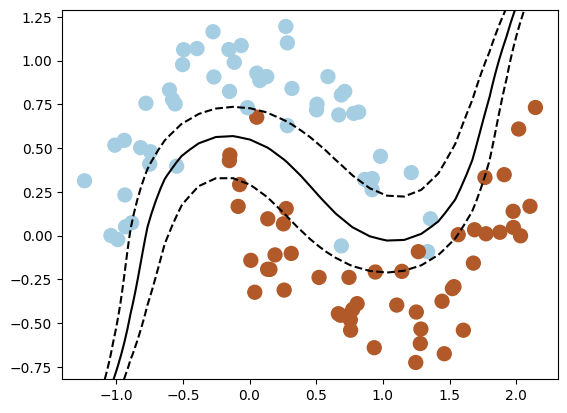

In [ ]:
# Plot the datapoints
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.Paired)

# Get the current axes
ax = plt.gca()
xlim = ax.get_xlim()
y_lim = ax.get_ylim()

# Create the grid to evaluate the model
xx = np.linspace(xlim[0], xlim[1],30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# # Transform the grid points (apply polynomial features and scaling)
Z = poly_kernel_svm.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and margins
ax.contour(XX,YY,Z, levels=[-1,0,1], linestyles=['--', '-', '--'], colors='k')

# Gaussian RBF kernal for Similarity Features

*   Just like polynomial features, the similarity features can be useful in ML algorithm; however,it can be computationally expensive

*   We can use the same kernel trick to make it possible to obtain similar result as if you had many similarity features



In [ ]:
rbf_kernel_svm = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf", SVC(kernel = "rbf", gamma=5, C=0.001))
])
rbf_kernel_svm.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

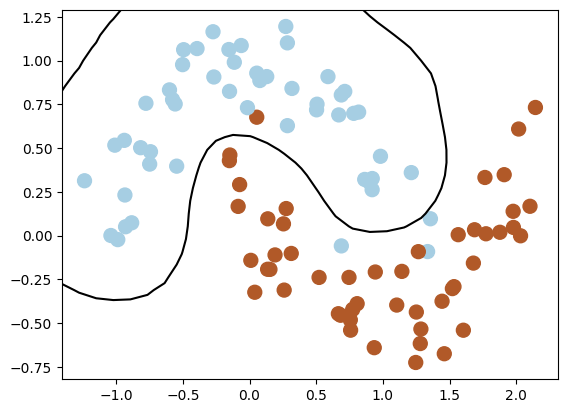

In [ ]:
# Plot the datapoints
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.Paired)

# Get the current axes
ax = plt.gca()
xlim = ax.get_xlim()
y_lim = ax.get_ylim()

# Create the grid to evaluate the model
xx = np.linspace(xlim[0], xlim[1],30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# # Transform the grid points (apply polynomial features and scaling)
Z = rbf_kernel_svm.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and margins
ax.contour(XX,YY,Z, levels=[-1,0,1], linestyles=['--', '-', '--'], colors='k')

In [ ]:
# SVM Regression
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=1.5)

In [ ]:
# To tackle non-linear regression tasks, you can use kernelized SVM model
from sklearn.svm import SVR

svm_poly_reg=SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

# Naive Bayes

*   Naive Bayes Classifier is based on Baye's Theorem which gives the conditional probability of an event A given B (refer to this video to understand what is conditional probability and how it is applied in Naive Bayes Classifier:

*   [Conditional Probabilty](https://www.youtube.com/watch?v=71oNiqPoKD8&t=557s)

*   [Naive Bayes Indepth Inuition](https://www.youtube.com/watch?v=jS1CKhALUBQ)



In [ ]:
import re
import string
import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()

In [ ]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
categories=['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
train = fetch_20newsgroups(subset='train',
                           categories=categories)

test = fetch_20newsgroups(subset='test',
                          categories = categories)

print(train.data[5])


From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [ ]:
print(test.data[5])

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

In [ ]:
print(len(test.data))
print(len(train.data))

7532
11314


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

"""Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article."""

'Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article.'

In [ ]:
# Create a multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
labels = model.predict(test.data)

Text(119.24999999999997, 0.5, 'predicted_label')

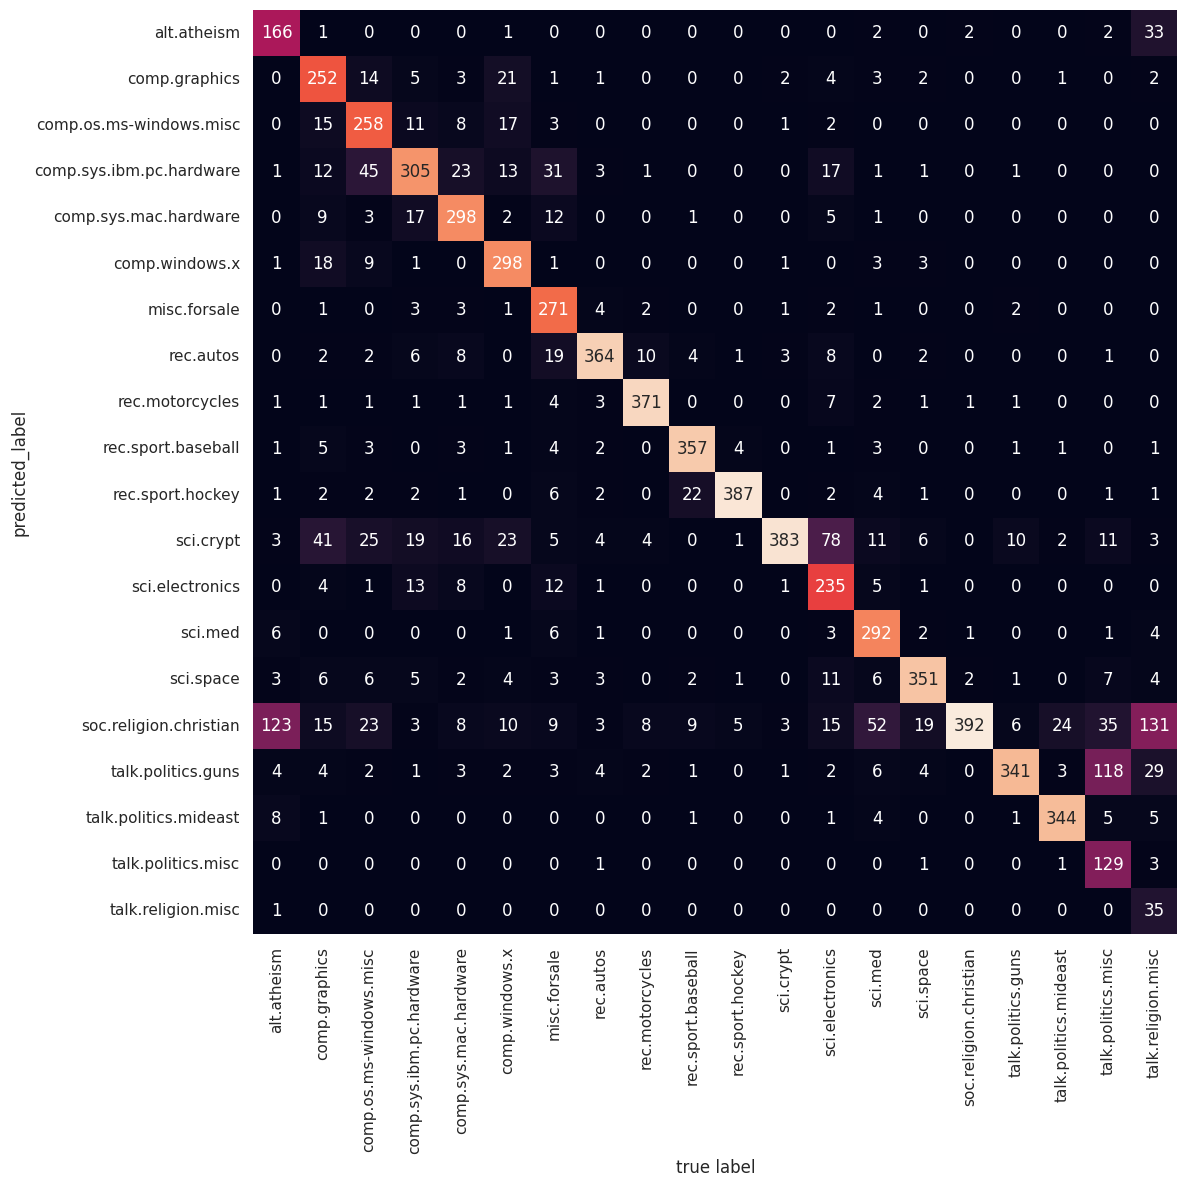

In [ ]:
# Creating confusion maxtrix and heatmap
plt.figure(figsize=(12,12))
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True,fmt='d',
            cbar=False, xticklabels = train.target_names,
            yticklabels=train.target_names)

#Plotting Heatmap and confusion matrix
plt.xlabel('true label')
plt.ylabel('predicted_label')

In [ ]:
#Predicting category on new data based on trained model

def predict_category(s,train=train,model=model):
  pred = model.predict([s])
  return train.target_names[pred[0]]

In [ ]:
predict_category('Jesus Christ')

'soc.religion.christian'

In [ ]:
predict_category('Is Honda a good car?')

'rec.autos'

# **UNSUPERVISED MACHINE LEARNING**

✅ Classification applications

*   Customer Segmentation

*   Data analysis

*   Dimensionality Reduction

*   Anomaly Detection

*   Semi-supervised ML

*   Search engines

*   Segmet an image


# K-Mean

*   Initially 2 **centroids(instances centered around a certain point)** are assigned

*   The Euclidean distance is used to find out which centroid is closet to the data point and the datapoints are assigned to the corresponding centroids.

*   Repositions the 2 centroids for optimization


*  **Distance measure**

  *   Euclidean Distance: The distance between 2 points in Euclidean space

  *   Squared Euclidean Distance: Same fucnction as Euclidean distance without square root

  *   Manhattan Distance: Distance between 2 points measured along axes at the right angle

  *   Cosine Distance: The angle between the 2 vectors







**How does K-Means clustering work**
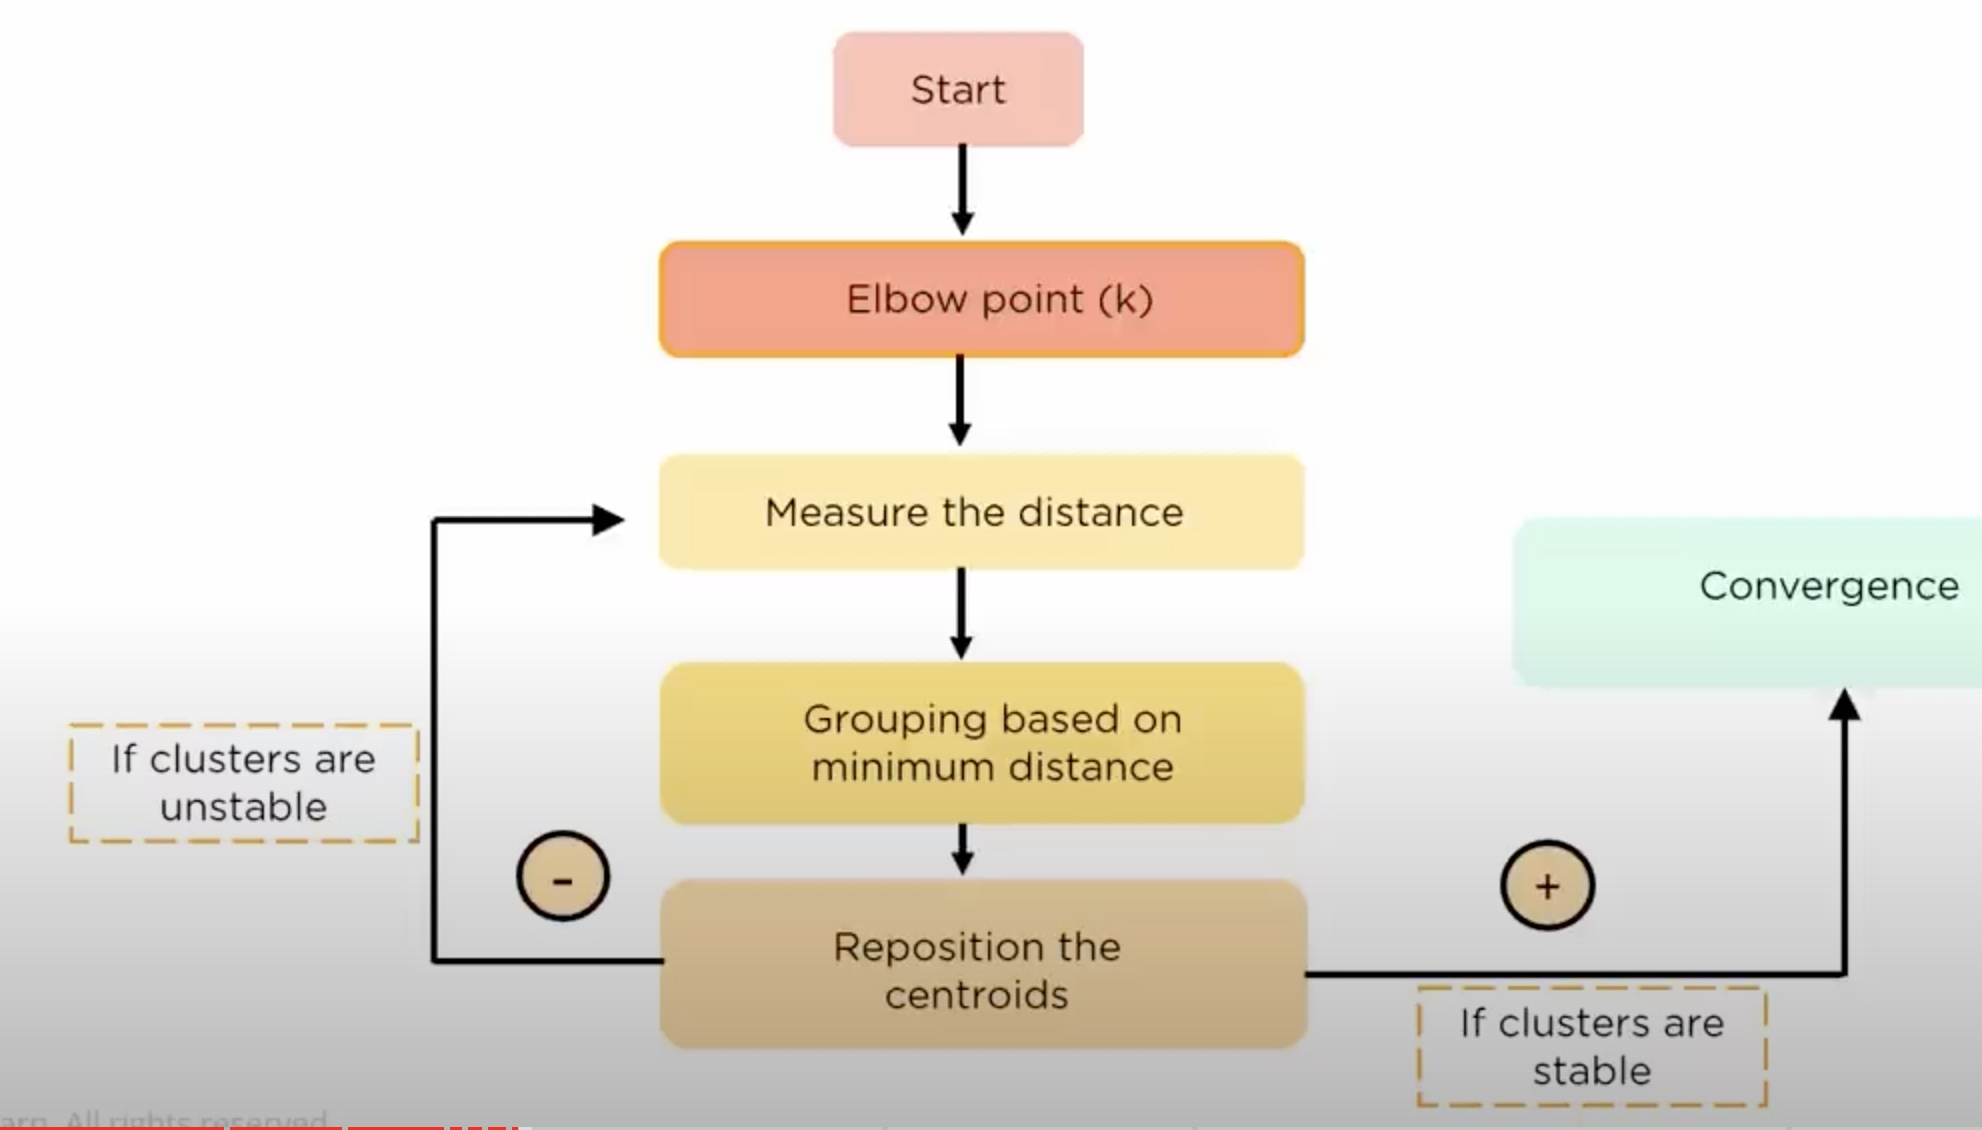

*   To find the optimal number of clusters (k), we use an algorithm called **silhoutte score**




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

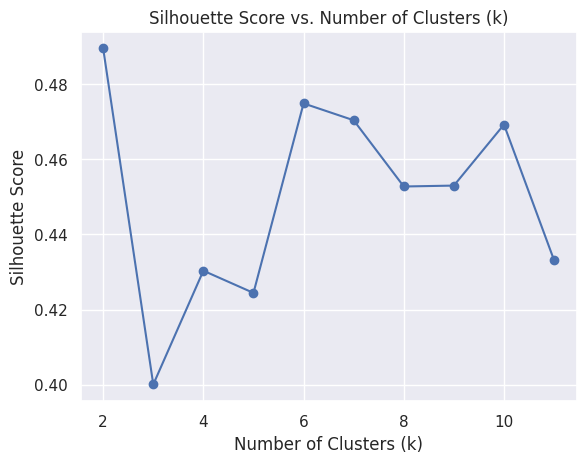

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_values=range(2,12)
silhouette_scores=[]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.show()

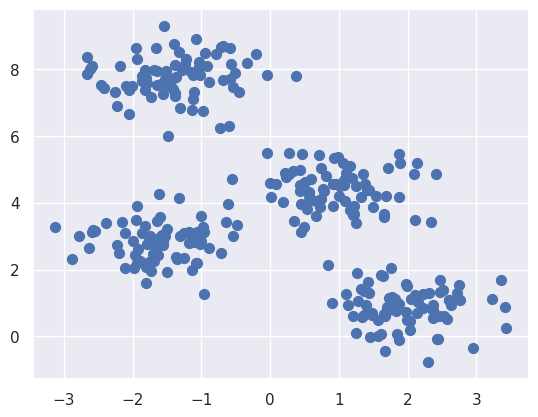

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std = 0.60, random_state=0)
plt.scatter(X[:,0], X[:, 1], s=50)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


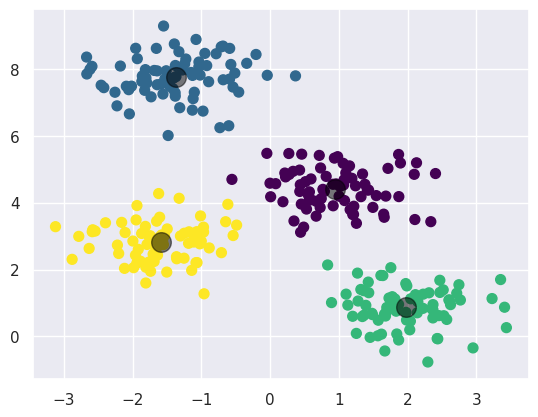

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_means = kmeans.predict(X)

from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
#1. Randomly choose clusters
  rng = np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters]
  centers = X[i]
  while True:
    #2. Assign labels based on closet centers
    labels=pairwise_distances_argmin(X,centers)
    #2b. Find new centers from mean of points
    new_centers = np.array([X[labels==i].mean(0) for i in range(n_clusters)])
    #2c. Check for convergence
    if np.all(centers==new_centers):
      break
    centers = new_centers

  return centers, labels

centers, labels = find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

plt.scatter(centers[:,0], centers[:,1],c='black',s=200,alpha=0.5)


# Anomaly Detection

**Isolation Forest (using Decision Tree)**: Calculate anomaly score, set a threshold and when a score of a datapoint pass the threshold, we consider that an outlier

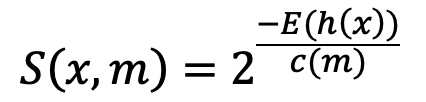

*   E(h(x)): Average search depth for x in the isolated tree (for e.g, you go down the tree just one time to find the outlier --> h(x)=1

*   c(m): Average depth of h(x)

*   E(h(x)) << c(m) --> S(x,m) ~ 1 --> Outliers

*   E(h(x)) >> c(n) --> S(x,m) ~ 0.5 --> Normal data points



**DBSCAN Clustering**: Use for non-linear clustering data

*   Hyperparameter:
  1.   minpts (minimum points)
  2.   E(Epsilon) = radius

*   **Core point**: A point is a core point if it has more than MinPts points within eps.
    * minpts = 4, so the data points within the epsilon must >=4. In this case, we have 6 data points   


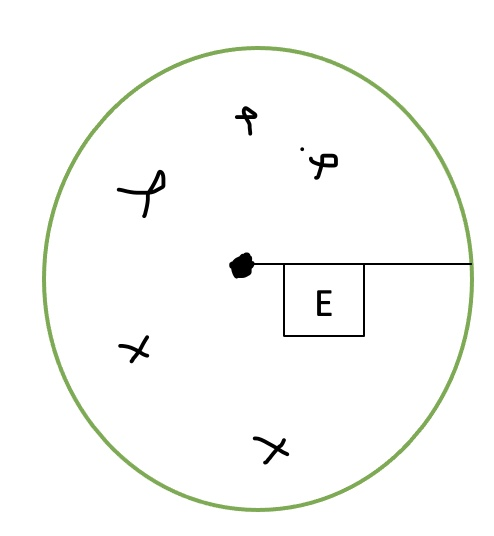


*   Border points: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point.


*   Noise/Outlier: A point which is not a core point or border point.




In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles

In [ ]:
X,y = make_circles(n_samples=750, factor=0.3, noise=0.1)

In [ ]:
X

array([[-1.05973544,  0.13986803],
       [ 0.04443557, -0.3289899 ],
       [ 0.04461401,  0.4143165 ],
       ...,
       [-0.077716  ,  0.20644772],
       [-0.04880127, -0.85428414],
       [ 0.21771114, -0.01296077]])

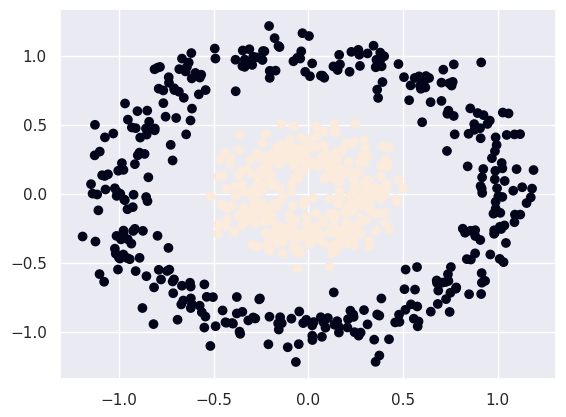

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
dbscan = DBSCAN(eps=0.10)

In [ ]:
dbscan.fit_predict(X)
#-1 are the outliers

array([ 0,  1,  1,  1,  2,  3,  1,  1,  4,  1, -1,  0,  1,  1,  5,  1,  1,
        1,  1,  1,  6, -1,  7,  4,  4, -1,  1,  2, -1,  1,  0, -1,  1,  1,
        6,  8,  8,  1,  8,  6,  1,  4,  1,  1,  9,  1,  4,  1,  8,  1,  1,
        4,  1,  0,  4,  1,  1,  1,  5,  8,  1, -1,  1,  1,  1,  1,  1,  4,
        1,  1,  9,  4,  4,  1, -1,  0, -1,  1,  1,  1,  5,  4,  1,  4,  2,
        1,  1,  8,  8,  1,  8,  1,  1,  0,  8,  1,  1,  1,  8,  1,  1,  4,
        0,  7,  9,  4, -1,  0,  8,  8,  4,  5,  4,  5,  1,  1,  4,  3,  1,
        9,  1,  1,  1,  8,  1,  4,  1, -1,  1,  7,  1, -1, -1,  1,  1,  9,
        1,  7,  1,  1,  4,  8,  4,  1,  0,  4,  1,  1,  0,  4,  4,  4, -1,
        2,  1,  1, -1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  6,  4,  1,  1,
        5,  1,  1,  2,  1, -1,  1,  8,  8,  1,  1,  1,  3,  0,  4,  1,  1,
        0,  1,  1,  1,  1, -1,  4, -1,  1, -1,  1,  2,  4,  1,  2,  1,  1,
        1, -1,  1,  1,  4,  1,  1,  1,  6,  1,  8,  1,  4,  1,  4,  1, -1,
        1, -1,  1,  1,  1

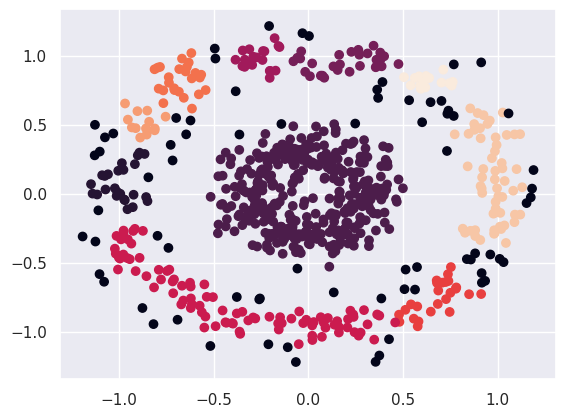

In [ ]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

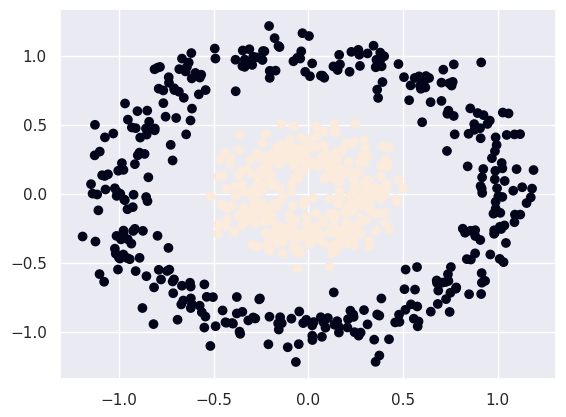

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

**Local Outlier Factor**

*   Local outlier: data points that are outside but closer to a spcific cluster (can be determined by LOF score <-- KNN)
  *   Using KNN, we try to determine the *local density*

*   Global outlier: data points that are totally isolated, not close to any clusters (can be determined by isolation forest or dbscan).

[LocalOutlierFactor](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html)


In [ ]:
import numpy as np

np.random.seed(42)

#Creates 100 random data points with 2 features, drawn from a normal distribution (mean = 0, standard deviation = 0.3).
X_inliers = 0.3 * np.random.randn(100, 2)

#Split data into two groups. One group of data points is shifted by adding 2 to each feature, and another group is shifted by subtracting 2. This essentially creates two clusters of inliers, one centered around (2, 2) and another around (-2, -2).
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

#Generates 20 random outliers uniformly distributed between -4 and 4 for both features. These outliers don't belong to the two clusters created earlier.
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

#Concatenate 2 arrays - numpy.r_[array[], array[]]
X = np.r_[X_inliers, X_outliers]

#This stores the number of outliers in the variable n_outliers.
n_outliers = len(X_outliers)

#an array ground_truth of size len(X) is created, filled with 1s, indicating that initially all data points are considered inliers.
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

from sklearn.neighbors import LocalOutlierFactor

#The model uses use 20 nearest neighbors to compute the local density of each point.
# contamination=0.1: about 10% of the data are outliers
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

Text(0.5, 1.0, 'Local Outlier Factor (LOF)')

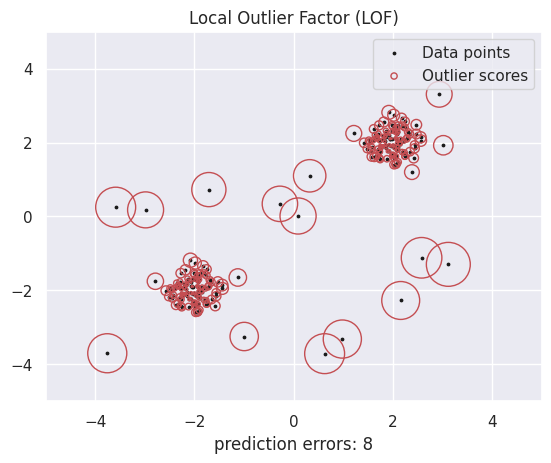

In [ ]:
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")

# Gaussian Mixture Model (GMM)

*   GMM is a probabilistic model representing data as a mixture of multiple Gaussian mixtures

*   Each Gaussian distribution represents a component or cluster within the data

*   Components of GMM:
  *   Number of clusters(k)

  *   Gaussian Distributions (normal distribution) as components
  
  *   Mixture Weights: GMM assigns weights to each component. representing the probability of selecting that component when generating data






In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
X = iris.data[:,:2]
df = pd.DataFrame(X)
df.head()

0    1
0  5.1  3.5
1  4.9  3.0
2  4.7  3.2
3  4.6  3.1
4  5.0  3.6

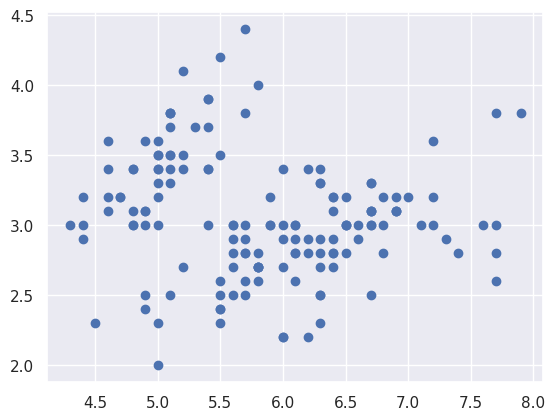

In [ ]:
plt.scatter(df[0],df[1])

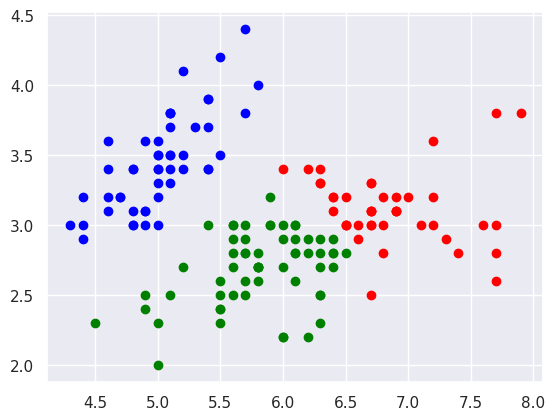

In [ ]:
gmm = GaussianMixture(n_components=3)

df.columns = df.columns.astype(str)
gmm.fit(df)

labels = gmm.predict(df)

df['labels']=labels
df0 = df[df['labels']==0]
df1 = df[df['labels']==1]
df2 = df[df['labels']==2]


plt.scatter(df0['0'], df0['1'], c='red')
plt.scatter(df1['0'], df1['1'], c='blue')
plt.scatter(df2['0'], df2['1'], c='green')

In [ ]:
print(gmm.lower_bound_)
print(gmm.n_iter_)

-1.4987505566235166
8


# Recommender System

*   Content based Filtering (i.e. Netflix...)
*   Colaborative Filtering (i.e. Amazon, Apple...)

   [Recommendation System](https://www.youtube.com/watch?v=_hf_y-_sj5Y&list=PLZoTAELRMXVN7QGpcuN-Vg35Hgjp3htvi)

   [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)







In [135]:
movies = pd.read_csv("/content/drive/MyDrive/movies.csv")
credits = pd.read_csv("/content/drive/MyDrive/credits.csv")

In [136]:
movies.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   10-12-2009  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   19-05-2007   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   26-10-2015   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   16-07-2012  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   07-03-2012   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [138]:
credits.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [159]:
credits_column_renamed = credits.rename(index=str, columns={"movie_id":"id"})

In [160]:
data = movies.merge(credits_column_renamed, on='id')

In [161]:
data.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   148.0   
3  [{"name": "Legendary Pictures", "id": 923}, {"...  ...   165.0   
4        [{"name": "Walt Disney Pictures", "id": 2}]  ...   132.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                    title_x vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   
3                     The Dark Knight Rises          7.6       9106   
4                               John Carter          6.1       2124   

                                    title_y  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne /

In [162]:
data.shape

(4803, 23)

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [165]:
data = data.drop(columns=['homepage','title_x','title_y','status','production_countries'])
data.head()

budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies release_date     revenue  \
0  [{"name": "Ingenious Film Partners", "id": 289...   10-12-2009  2787965087   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   19-05-2007   961000000   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   26-10-2015   880674609   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   16-07-2012  1084939099   
4        [{"name": "Walt Disney Pictures", "id": 2}]   07-03-2012   284139100   

   runtime                                   spoken_languages  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1    169.0           [{"iso_639_1": "en", "name": "English"}]   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...   
3    165.0           [{"iso_639_1": "en", "name": "English"}]   
4    132.0           [{"iso_639_1": "en", "name": "English"}]   

                                          tagline  vote_average  vote_count  \
0                     Enter the World of Pandora.           7.2       11800   
1  At the end of the world, the adventure begins.           6.9        4500   
2                           A Plan No One Escapes           6.3        4466   
3                                 The Legend Ends           7.6        9106   
4            Lost in our world, found in another.           6.1        2124   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

In [167]:
tvf = TfidfVectorizer(min_df=3, max_features=None,
                      strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                      ngram_range=(1,3),
                      stop_words = 'english')
data['overview']=data['overview'].fillna('')

# Components explain (from sklearn documentation)

#strip_accents: Remove accents and perform other character normalization during the preprocessing step. Unicode method that works on any characters

#analyzer: Whether the feature should be made of word or character n-grams

#min_df: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold

In [169]:
tvf_matrix=tvf.fit_transform(data['overview'])

In [170]:
tvf_matrix

<4803x10417 sparse matrix of type '<class 'numpy.float64'>'
	with 127220 stored elements in Compressed Sparse Row format>

In [171]:
tvf_matrix.shape

(4803, 10417)

In [177]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tvf_matrix,tvf_matrix)
sig[0]

array([0.76163447, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [173]:
indices = pd.Series(data.index, index=data['original_title']).drop_duplicates()

In [206]:
indices.index

Index(['Avatar', 'Pirates of the Caribbean: At World's End', 'Spectre',
       'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled',
       'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince',
       'Batman v Superman: Dawn of Justice',
       ...
       'On The Downlow', 'Sanctuary: Quite a Conundrum', 'Bang', 'Primer',
       'Cavite', 'El Mariachi', 'Newlyweds', 'Signed, Sealed, Delivered',
       'Shanghai Calling', 'My Date with Drew'],
      dtype='object', name='original_title', length=4803)

In [207]:
indices['Newlyweds']

4799

In [208]:
sig[4799]

array([0.76159416, 0.76159416, 0.76159438, ..., 0.76159432, 0.76159416,
       0.76159478])

In [209]:
list(enumerate(sig[indices['Newlyweds']]))

[(0, 0.7615941559557649),
 (1, 0.7615941559557649),
 (2, 0.7615943791623508),
 (3, 0.7615945564232902),
 (4, 0.7615945779342556),
 (5, 0.7615943267971559),
 (6, 0.7615948190414071),
 (7, 0.761594346971664),
 (8, 0.7615943903358866),
 (9, 0.761594688255891),
 (10, 0.7615941559557649),
 (11, 0.7615941559557649),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615941559557649),
 (16, 0.7615943548130525),
 (17, 0.761594965420998),
 (18, 0.7615942819944952),
 (19, 0.7615945082445131),
 (20, 0.7615942928381602),
 (21, 0.7615949832832596),
 (22, 0.7615941559557649),
 (23, 0.761594428370306),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615941559557649),
 (27, 0.7615944537585686),
 (28, 0.7615941559557649),
 (29, 0.7615943053510925),
 (30, 0.7615943361754078),
 (31, 0.76159445046522),
 (32, 0.7615941559557649),
 (33, 0.7615944286938301),
 (34, 0.7615941559557649),
 (35, 0.7615941559557649),
 (36, 0.7615941559557649),
 (37, 0.761594394

In [210]:
sig_scores=sorted(list(enumerate(sig[indices['Newlyweds']])), key=lambda x:x[1],reverse=True)

In [220]:
def give_rec(title,sig=sig):
  #Get the index corresponding to the original title
  idx=indices[title]


  #Sort the movies
  sig_scores = list(enumerate(sig[idx]))
  sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

  #Scores of the 10 most similar movies
  sig_scores=sig_scores[1:11]

  #Movie indices
  movie_indices = [i[0] for i in sig_scores]

  #Top 10 most similar movies
  return data['original_title'].iloc[movie_indices]


In [221]:
give_rec('Spy Kids')

1302    Spy Kids 2: The Island of Lost Dreams
1155                  Spy Kids 3-D: Game Over
1769      Spy Kids: All the Time in the World
4044                               Go for It!
3359                              In Too Deep
1631                                 Mr. 3000
1825                Jimmy Neutron: Boy Genius
339                           The Incredibles
3793                     The Velocity of Gary
1081                       Revolutionary Road
Name: original_title, dtype: object